
Name: Chanyu Choung

Class: CMP414

Date: May 24th, 2021 (Monday)

Test: The Final Exam

# Artificial Intelligence
# Test 2

**Instructions**
- Test time: **Monday, May 24th, 1:30 - 3:30 pm**
- Total score: 100 points
- **Before you start,** make sure that you save a copy of this notebook in your Google Drive using the option "Save a copy in Drive" from the "File" menu.
- There are two types of questions:
    - **Short answer questions**: you are expected to write your response in detail in the text cells corresponding to these questions.
    - **Coding questions**: you are expected to write correct Python statements, and show the execution results.
- This is an open-book test. You can use the textbook and the class notes to help you solve the problems.
- You can use functions imported from `sklearn`, `numpy`, `pandas`, and `matplotlib`.
- **When you finish the test**, please download the notebook as a PDF file using the "Print" option from the "File" menu (choose "Print to PDF"). Submit the PDF file to Blackboard under the "Test 1" assignment before the end of the test.
- **If you have any questions**, please join the class Zoom meeting 202 609 9616 and ask me.

## Question 1 (10 pts)

Which of the following graphs indicate that the model (blue line) is overfitting the data (orange points)? Which graphs indicate underfitting?

<img src="https://github.com/ch00226855/ImputationGAN/blob/master/Test02Img01.png?raw=true" width="600">


**Write your answers here (double-click this line to enable editing):**

A, F are optimized data. - these are well-balanced

B, D are underfitting the data. - it's too flat

C, E are overfitting the data. - it's overkill


## Question 2 (10 pts)
Describe a method that can detect outliers in a dataset.


**Write your answers here (double-click this line to enable editing):**

You can display the graph with SVM with soft margin and detect the ones that are ignored by it.

You can also use .describe function to detect the abnormal mean.


## Question 3 (30 pts)

Apply the SVM model with polynomial kernel to build a classifier on the dataset generated below. Each record has three features: $x_1$ and $x_2$ are input features, and $y$ is the target class label. Choose a proper polynomial degree to achive at least 90% training accuracy.

Write a code snippet that does the following:
1. Build an SVM model with polynomial kernel using the `sklearn.svm.SVC` class.
2. Train the model with `data`.
3. Show that the accuracy of the model on `data` is above 90%.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Execute this cell to load the data.
from sklearn.datasets import make_moons
raw_data = make_moons(n_samples=200, noise=0.1, random_state=123)
data = pd.DataFrame(raw_data[0], columns=['x1', 'x2'])
data['y'] = raw_data[1]
data.head()

,x1,x2,y
0,-0.046914,1.031404,0
1,0.273722,-0.161737,1
2,0.493077,0.797366,0
3,1.016273,-0.575626,1
4,0.857463,0.633812,0


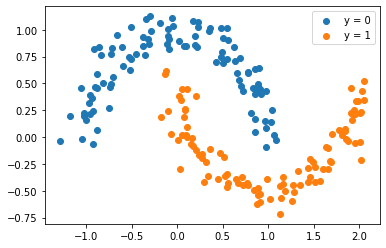

In [ ]:
# Visualize the data
for label in data['y'].unique():
    subdata = data[data['y'] == label]
    plt.scatter(subdata['x1'], subdata['x2'], cmap=plt.cm.rainbow, label=("y = %d" % label))
plt.legend()
plt.show()

In [ ]:
# Write your code here
# 1. Build an SVM model with polynomial kernel using the sklearn.svm.SVC class.
from sklearn.svm import SVC
model = SVC(C=10, kernel='poly', degree=5, coef0=0)

In [ ]:
# Write your code here
# 2. Train the model with data.
model.fit(data[["x1", "x2"]], data["y"])
pred = model.predict(data[["x1", "x2"]])

In [ ]:
# Write your code here
# Show that the accuracy of the model on data is above 90%.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(data['y'], pred)
print(accuracy)

0.935


## Question 4 (30 pts)

The following dataset contains 11 biomedical attributes of 720 individuals. You are expected to build a decision tree model on this dataset and find out who are more likely to have heart disease.

In [ ]:
# Execute this cell to load the data.
url = "https://github.com/SpiroGanas/Heart-Disease-Machine-Learning/raw/master/heart_disease_df.csv"
data2 = pd.read_csv(url, sep=',', index_col=0)
data2.drop(['slope', 'ca', 'thal', 'Source'], inplace=True, axis=1)
data2 = data2.dropna()
data2['diagnosis'] = (data2['diagnosis'] > 0).astype(int)
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0


Column information:

1. `age`
2. `sex`: 0 = female, 1 = male
3. `cp`: chest pain type (4 values)
4. `trestbps`: resting blood pressure
5. `chol`: serum cholestoral in mg/dl
6. `fbs`: fasting blood sugar > 120 mg/dl
7. `restecg`: resting electrocardiographic results (values 0,1,2)
8. `thalach`: maximum heart rate achieved
9. `exang`: exercise induced angina
10. `oldpeak`: ST depression induced by exercise relative to rest

The last column `diagnosis` is the target feature, where 1 means that the person has been diagnosed as having heart disease, and 0 means otherwise.

Please do the following:
1. Build a depth-3 decision tree classifier to prediction the `diagnosis` value from other features.
2. Visualize the model as a tree of conditions. You may need to include statement `plt.figure(figsize=(15, 15))` to make the plot readable.
3. Identify a group of conditions that lead to high risk of heart disease. Also identify a group of conditions that lead to low risk of heart disease.

In [ ]:
# Write your code here
# 1. Build a depth-3 decision tree classifier to prediction the diagnosis value from other features.
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

column2 = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak"]

model2.fit(data2.loc[:, column2], data2["diagnosis"])
pred2 = model2.predict(data2.loc[:, column2])

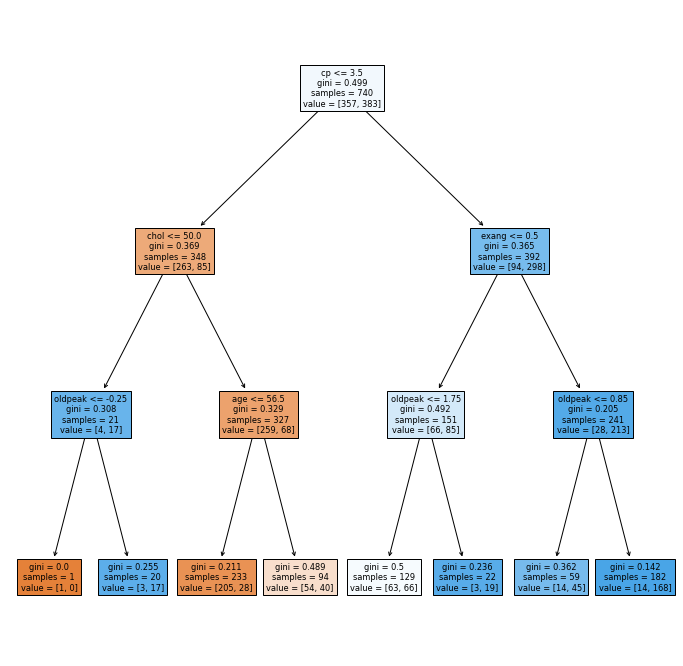

In [ ]:
# Write your code here
# 2. Visualize the model as a tree of conditions. You may need to include statement plt.figure(figsize=(10, 10)) to make the plot readable.
from sklearn.tree import plot_tree
plt.figure(figsize=(12,12))
plot_tree(model2, feature_names=column2, filled=True)
plt.show()

3. Identify a group of conditions that lead to high risk of heart disease. Also identify a group of conditions that lead to low risk of heart disease.

**Write your answer here:**

A group with low risk heart disease:

- cp <= 3.5 true
- chol <= 50 false
- age <= 56.5 true

[205, 28] = 28 diagnosed w/ heart disease, 205 otherwise

A group with high risk heart disease:
- cp <= 3.5 false
- exang <= 0.5 false
- oldpeak <= 0.85 false

[14, 168] = 168 diagnosed w/ heart disease, 14 otherwise

## Question 5 (20 pts)
1. Define a `relu()` function that represents the ReLU function defined as:
$$ ReLU(t) = \max\{0, t\}.$$
For example, `relu(0)` returns 0, `relu(5)` returns 5, and `relu(-5)` returns 0. This function will be used as the activation function of neurons in the next step.

In [ ]:
# Code for relu():
def relu(x):
    return max(0.0, x)

print('relu 0:', relu(0))
print('relu 5:', relu(5))
print('relu -5:', relu(-5))

relu 0: 0.0
relu 5: 5
relu -5: 0.0


2. Suppose that 3-layer neural network is defined as below:

<img src="https://github.com/ch00226855/ImputationGAN/blob/master/Test02Img02.png?raw=true" width="400">

The number near each arrow is the weight parameter associated with that connection. Suppose that there are no bias parameters.

Suppose that both neurons in the input layer receives value 1 from the data. Calculate and print the input and output of each neuron in the hidden layer and the output layer.

In [ ]:
# Write your calculations here:
ans1 = (1 * -0.5) + (1 * -0.32)
ans2 = (1 * 1.01) + (1 * -0.24)
ans3 = (1 * 0.23) + (1 * -0.12)
ans4 = (0 * 0.15) + (0.77 * 1.32) + (0.11 * -0.37)
print(ans1, ans2, ans3, ans4)

# Hidden Layers:
# node 1 = -0.82
# node 2 = 0.77
# node 3 = 0.11
print(relu(-0.82), relu(0.77), relu(0.11))

# Output Layers:
# output = (0 * 0.15) + (0.77 * 1.32) + (0.11 * -0.37) = 0.9757
print(relu(0.9757))

-0.8200000000000001 0.77 0.11000000000000001 0.9757
0.0 0.77 0.11
0.9757
